In [4]:
#look data and find used pandas
import pandas as pd
import numpy as np

medal = pd.read_csv('medals.csv')

In [5]:
print(medal)

     team      country  year  events  athletes   age  height  weight  medals  \
0     AFG  Afghanistan  1964       8         8  22.0   161.0    64.2       0   
1     AFG  Afghanistan  1968       5         5  23.2   170.2    70.0       0   
2     AFG  Afghanistan  1972       8         8  29.0   168.3    63.8       0   
3     AFG  Afghanistan  1980      11        11  23.6   168.4    63.2       0   
4     AFG  Afghanistan  2004       5         5  18.6   170.8    64.8       0   
...   ...          ...   ...     ...       ...   ...     ...     ...     ...   
2139  ZIM     Zimbabwe  2000      19        26  25.0   179.0    71.1       0   
2140  ZIM     Zimbabwe  2004      11        14  25.1   177.8    70.5       3   
2141  ZIM     Zimbabwe  2008      15        16  26.1   171.9    63.7       4   
2142  ZIM     Zimbabwe  2012       8         9  27.3   174.4    65.2       0   
2143  ZIM     Zimbabwe  2016      13        31  27.5   167.8    62.2       0   

      prev_medals  prev_3_medals  
0   

In [6]:
#select data 
medal = medal[["team","country","year","athletes", "age","prev_medals","medals"]]


     team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2144 rows x 7 columns]


In [63]:
medal

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
#find  correlation data
#between medals, athletes, age etc
medal.corr()["medals"]

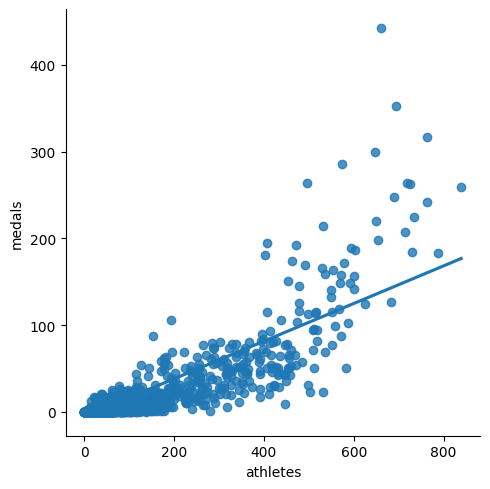

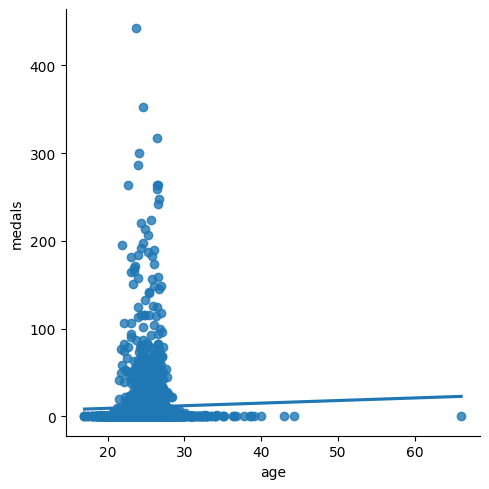

In [66]:

import seaborn as sns


sns.lmplot(x="athletes", y="medals", data=medal, fit_reg=True, ci=None)


sns.lmplot(x="age", y="medals", data=medal, fit_reg=True, ci=None)


<Axes: ylabel='Frequency'>

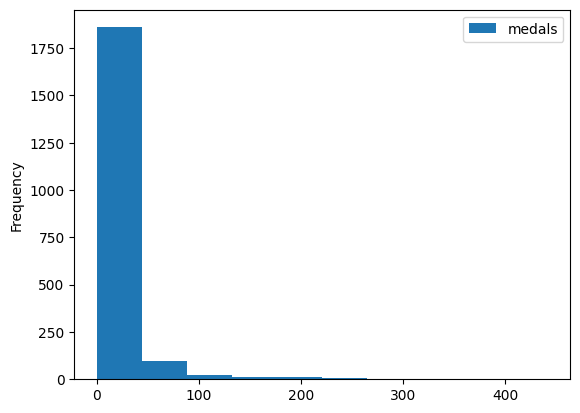

In [159]:
medal.plot.hist(y="medals")

In [84]:
# look missinng data

medal[medal.isnull().any(axis=1)]


,team,country,year,athletes,age,prev_medals,medals


In [82]:
#data cleaning used dropna
medal = medal.dropna()
medal

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [111]:
train = medal[medal["year"] < 2012].copy()
test = medal[medal["year"] >= 2012].copy()

In [112]:
train.shape

(1609, 7)

In [113]:
test.shape

(405, 7)

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [115]:
predictors = ["athletes","prev_medals"]
target = "medals"

In [116]:
model.fit(train[predictors],train["medals"])

LinearRegression()

In [117]:
predictions = model.predict(test[predictors])

In [118]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [170]:
test["predictions"] =  predictions

In [172]:
test


,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [174]:
test.loc[test["predictions"] < 0, "predictions"] = 0

# save data to new CSV
test.to_csv("predictions_medals.csv")

test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [175]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

error

3.2971993416169854

In [176]:
medal.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [177]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [129]:
test[test["team"] == "INA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
893,INA,Indonesia,2012,22,23.5,7.0,2,4.689792
894,INA,Indonesia,2016,31,24.5,2.0,4,1.581999


In [189]:
test[test["team"]=="JPN"]


,team,country,year,athletes,age,prev_medals,medals,predictions
1048,JPN,Japan,2012,399,25.1,51.0,84,64.749642
1049,JPN,Japan,2016,436,25.4,84.0,64,92.173323


In [180]:
test[test["team"]=="CHN"]

,team,country,year,athletes,age,prev_medals,medals,predictions
404,CHN,China,2012,479,24.0,184.0,125,170.319135
405,CHN,China,2016,499,24.0,125.0,113,127.466307


In [146]:
errors = (test["medals"] - predictions).abs()

errors

6       1.961221
7       1.176333
24      1.425032
25      1.711847
37      1.155629
          ...   
2111    1.926958
2131    1.640143
2132    1.640143
2142    1.505767
2143    0.080748
Name: medals, Length: 405, dtype: float64

In [147]:
error_by_team = errors.groupby(test["team"]).mean()

error_by_team

team
AFG    1.568777
ALB    1.568439
ALG    1.535133
AND    1.783551
ANG    0.322667
         ...   
VIE    1.231905
VIN    1.891106
YEM    1.891106
ZAM    1.640143
ZIM    0.793257
Name: medals, Length: 204, dtype: float64

In [148]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [153]:
error_ratio = error_by_team / medals_by_team
error_ratio

team
AFG    3.137554
ALB         inf
ALG    1.023422
AND         inf
ANG         inf
         ...   
VIE    1.231905
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [154]:
error_ratio[~pd.isnull(error_ratio)]
error_ratio

team
AFG    3.137554
ALB         inf
ALG    1.023422
AND         inf
ANG         inf
         ...   
VIE    1.231905
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [155]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    3.137554
ALG    1.023422
ARG    0.841636
ARM    0.433824
AUS    0.362901
         ...   
UKR    0.946412
USA    0.128207
UZB    0.658187
VEN    1.710208
VIE    1.231905
Name: medals, Length: 97, dtype: float64

In [157]:

error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

In [158]:
# I think this model have good prediction and we can add in more predictors
# I think we can try defferent model for prediction 
# Thank u all 
# code is life

'''Muhammad Feby Khoiru Sidqi'''

'Muhammad Feby Khoiru Sidqi'